# **Step 1: Import Libraries**

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Step 2: Load and Explore the Dataset**

In [ ]:
# Upload the dataset
data_path = "/content/ai-medical-chatbot (35000).csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Show basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display the overall shape of the dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset Preview:
                                         Description  \
0      Q. What does abutment of the nerve root mean?   
1  Q. What should I do to reduce my weight gained...   
2  Q. I have started to get lots of acne on my fa...   
3  Q. Why do I have uncomfortable feeling between...   
4  Q. My symptoms after intercourse threatns me e...   

                                             Patient  \
0  Hi doctor,I am just wondering what is abutting...   
1  Hi doctor, I am a 22-year-old female who was d...   
2  Hi doctor! I used to have clear skin but since...   
3  Hello doctor,I am having an uncomfortable feel...   
4  Hello doctor,Before two years had sex with a c...   

                                              Doctor  
0  Hi. I have gone through your query with dilige...  
1  Hi. You have really done well with the hypothy...  
2  Hi there Acne has multifactorial etiology. Onl...  
3  Hello. The popping and discomfort what you fel...  
4  Hello. The HIV test uses a fing

# **Step 3: Data Preprocessing**

In [ ]:
# Limit dataset to 35,000 rows for efficiency
df = df.sample(n=35000, random_state=42)

# Drop rows with missing data in key columns
df.dropna(subset=['Description', 'Doctor'], inplace=True)

# Reset index after sampling
df.reset_index(drop=True, inplace=True)

# Convert text to lowercase for consistency
df['Description'] = df['Description'].str.lower()
df['Doctor'] = df['Doctor'].str.lower()

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(df.describe(include='all'))



Dataset Statistics:
                                              Description  \
count                                               35000   
unique                                              24436   
top     q. for how long should i take kalachikai powde...   
freq                                                 1109   

                                                  Patient  \
count                                               35000   
unique                                              24928   
top     Hello doctor,As I have PCOD problem and also c...   
freq                                                 1109   

                                                   Doctor  
count                                               35000  
unique                                              22687  
top     hi. for further doubts consult a sexologist on...  
freq                                                 1481  


# **Step 4: Exploratory Data Analysis (EDA)**

**Quantitative Analysis**

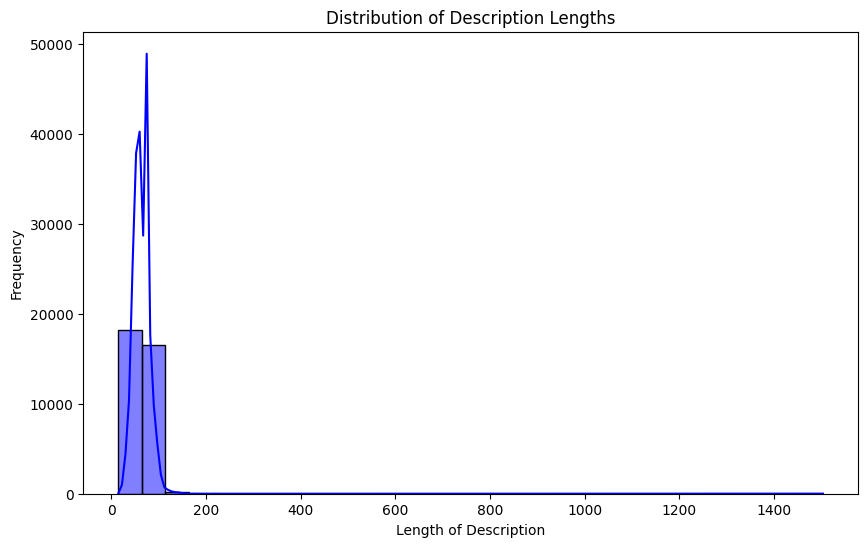

In [ ]:
# Visualize the length of the descriptions
df['description_length'] = df['Description'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Description Lengths')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()


**Qualitative Analysis**

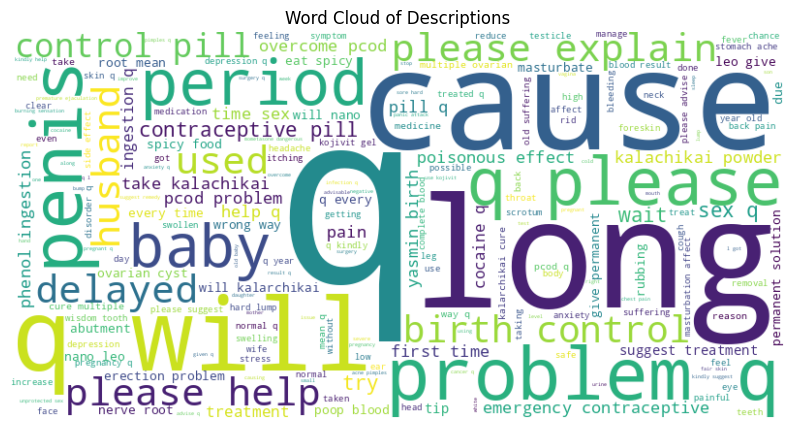

In [ ]:
# Generate a Word Cloud for the 'Description' column
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()
